# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

import random
from collections import namedtuple, deque

import matplotlib.pyplot as plt
%matplotlib inline
is_ipython = 'inline' in plt.get_backend()
if is_ipython:
    from IPython import display
plt.ion()

from deep_rl import *

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='./Reacher_Linux/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)

# STUDENT: Disabling random run!

while False:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.0


When finished, you can close the environment.

In [6]:
def run_steps_2(agent):
    random_seed()
    config = agent.config
    while True:
        rewards = agent.rewards_deque
        if config.log_interval and not agent.total_steps % config.log_interval and len(agent.episode_rewards):            
            config.logger.info('Mean return of %.2f over a window of %d recent episodes. %d episodes played so far, most recent episodic return is %.2f' % (
                np.mean(rewards), len(rewards), len(agent.rewards_all), agent.rewards_all[-1]))
        if len(rewards) and (np.mean(rewards) >= 30.0):
            save_path = 'winning_model.bin'
            agent.save(save_path)
            res = True, agent.rewards_deque, agent.rewards_all, save_path
            agent.close()
            return res
        if config.max_steps and agent.total_steps >= config.max_steps:
            agent.close()
            return False, None, None, None
        agent.step()


In [7]:
class ReacherMultiTask(BaseTask):
    def __init__(self):
        BaseTask.__init__(self)
        self.name = 'ReacherMulti'
        self.env = env
        self.action_dim = brain.vector_action_space_size
        self.state_dim = brain.vector_observation_space_size
        
    def reset(self):
        env_info = self.env.reset(train_mode=True)[brain_name]
        return np.array(env_info.vector_observations)

    def step(self, action):
        action = np.clip(action, -1, 1)
        env_info = self.env.step(action)[brain_name]
        next_state = env_info.vector_observations   # get the next state
        reward = env_info.rewards                   # get the reward
        done = env_info.local_done
        if np.any(done):
            next_state = self.reset()
        return np.array(next_state), np.array(reward), np.array(done), None
    
    def seed(self, random_seed):
        pass
    
def ppo_cont_2():
    config = Config()
    config.num_workers = num_agents
    # task_fn = lambda log_dir: Pendulum(log_dir=log_dir)
    # task_fn = lambda log_dir: Bullet('AntBulletEnv-v0', log_dir=log_dir)
    task_fn = lambda : ReacherMultiTask()
    config.task_fn = task_fn
    config.eval_env = task_fn()

    config.network_fn = lambda: GaussianActorCriticNet(
        config.state_dim, config.action_dim, actor_body=FCBody(config.state_dim),
        critic_body=FCBody(config.state_dim))
    config.optimizer_fn = lambda params: torch.optim.Adam(params, 3e-4, eps=1e-5)
    config.discount = 0.99
    config.use_gae = True
    config.gae_tau = 0.95
    config.gradient_clip = 5
    config.rollout_length = 2048
    config.optimization_epochs = 10
    config.num_mini_batches = 32
    config.ppo_ratio_clip = 0.2
    config.log_interval = 2048
    config.max_steps = 2e7
    config.logger = get_logger()
    return run_steps_2(PPOAgent(config))
    
success, rwd_deque, rwd_all, model_path = ppo_cont_2()

INFO:MAIN:Mean return of 0.17 over a window of 2 recent episodes. 2 episodes played so far, most recent episodic return is 0.17
INFO:MAIN:Mean return of 0.19 over a window of 4 recent episodes. 4 episodes played so far, most recent episodic return is 0.21
INFO:MAIN:Mean return of 0.18 over a window of 6 recent episodes. 6 episodes played so far, most recent episodic return is 0.16
INFO:MAIN:Mean return of 0.23 over a window of 8 recent episodes. 8 episodes played so far, most recent episodic return is 0.37
INFO:MAIN:Mean return of 0.33 over a window of 10 recent episodes. 10 episodes played so far, most recent episodic return is 0.67
INFO:MAIN:Mean return of 0.40 over a window of 12 recent episodes. 12 episodes played so far, most recent episodic return is 0.84
INFO:MAIN:Mean return of 0.48 over a window of 14 recent episodes. 14 episodes played so far, most recent episodic return is 0.88
INFO:MAIN:Mean return of 0.57 over a window of 16 recent episodes. 16 episodes played so far, most

INFO:MAIN:Mean return of 6.19 over a window of 100 recent episodes. 130 episodes played so far, most recent episodic return is 9.65
INFO:MAIN:Mean return of 6.33 over a window of 100 recent episodes. 132 episodes played so far, most recent episodic return is 9.07
INFO:MAIN:Mean return of 6.55 over a window of 100 recent episodes. 135 episodes played so far, most recent episodic return is 9.43
INFO:MAIN:Mean return of 6.69 over a window of 100 recent episodes. 137 episodes played so far, most recent episodic return is 10.14
INFO:MAIN:Mean return of 6.83 over a window of 100 recent episodes. 139 episodes played so far, most recent episodic return is 9.70
INFO:MAIN:Mean return of 6.98 over a window of 100 recent episodes. 141 episodes played so far, most recent episodic return is 11.49
INFO:MAIN:Mean return of 7.13 over a window of 100 recent episodes. 143 episodes played so far, most recent episodic return is 10.19
INFO:MAIN:Mean return of 7.27 over a window of 100 recent episodes. 145 e

INFO:MAIN:Mean return of 13.48 over a window of 100 recent episodes. 257 episodes played so far, most recent episodic return is 15.17
INFO:MAIN:Mean return of 13.57 over a window of 100 recent episodes. 259 episodes played so far, most recent episodic return is 15.97
INFO:MAIN:Mean return of 13.67 over a window of 100 recent episodes. 261 episodes played so far, most recent episodic return is 15.54
INFO:MAIN:Mean return of 13.77 over a window of 100 recent episodes. 263 episodes played so far, most recent episodic return is 16.58
INFO:MAIN:Mean return of 13.88 over a window of 100 recent episodes. 265 episodes played so far, most recent episodic return is 16.87
INFO:MAIN:Mean return of 14.01 over a window of 100 recent episodes. 268 episodes played so far, most recent episodic return is 16.60
INFO:MAIN:Mean return of 14.10 over a window of 100 recent episodes. 270 episodes played so far, most recent episodic return is 17.03
INFO:MAIN:Mean return of 14.20 over a window of 100 recent epi

INFO:MAIN:Mean return of 19.96 over a window of 100 recent episodes. 384 episodes played so far, most recent episodic return is 22.58
INFO:MAIN:Mean return of 20.04 over a window of 100 recent episodes. 386 episodes played so far, most recent episodic return is 21.52
INFO:MAIN:Mean return of 20.13 over a window of 100 recent episodes. 388 episodes played so far, most recent episodic return is 24.10
INFO:MAIN:Mean return of 20.22 over a window of 100 recent episodes. 390 episodes played so far, most recent episodic return is 21.74
INFO:MAIN:Mean return of 20.32 over a window of 100 recent episodes. 392 episodes played so far, most recent episodic return is 24.36
INFO:MAIN:Mean return of 20.43 over a window of 100 recent episodes. 394 episodes played so far, most recent episodic return is 23.96
INFO:MAIN:Mean return of 20.52 over a window of 100 recent episodes. 396 episodes played so far, most recent episodic return is 22.66
INFO:MAIN:Mean return of 20.61 over a window of 100 recent epi

INFO:MAIN:Mean return of 25.06 over a window of 100 recent episodes. 511 episodes played so far, most recent episodic return is 26.65
INFO:MAIN:Mean return of 25.13 over a window of 100 recent episodes. 513 episodes played so far, most recent episodic return is 28.24
INFO:MAIN:Mean return of 25.21 over a window of 100 recent episodes. 515 episodes played so far, most recent episodic return is 26.73
INFO:MAIN:Mean return of 25.29 over a window of 100 recent episodes. 517 episodes played so far, most recent episodic return is 27.47
INFO:MAIN:Mean return of 25.35 over a window of 100 recent episodes. 519 episodes played so far, most recent episodic return is 27.69
INFO:MAIN:Mean return of 25.41 over a window of 100 recent episodes. 521 episodes played so far, most recent episodic return is 26.33
INFO:MAIN:Mean return of 25.49 over a window of 100 recent episodes. 523 episodes played so far, most recent episodic return is 27.40
INFO:MAIN:Mean return of 25.57 over a window of 100 recent epi

INFO:MAIN:Mean return of 29.40 over a window of 100 recent episodes. 638 episodes played so far, most recent episodic return is 29.90
INFO:MAIN:Mean return of 29.47 over a window of 100 recent episodes. 640 episodes played so far, most recent episodic return is 29.92
INFO:MAIN:Mean return of 29.57 over a window of 100 recent episodes. 642 episodes played so far, most recent episodic return is 31.68
INFO:MAIN:Mean return of 29.62 over a window of 100 recent episodes. 644 episodes played so far, most recent episodic return is 30.77
INFO:MAIN:Mean return of 29.65 over a window of 100 recent episodes. 646 episodes played so far, most recent episodic return is 30.43
INFO:MAIN:Mean return of 29.69 over a window of 100 recent episodes. 648 episodes played so far, most recent episodic return is 31.15
INFO:MAIN:Mean return of 29.73 over a window of 100 recent episodes. 650 episodes played so far, most recent episodic return is 31.38
INFO:MAIN:Mean return of 29.79 over a window of 100 recent epi

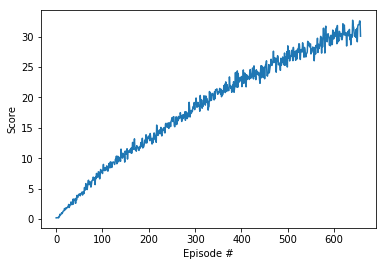

In [8]:
if success:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(rwd_all)), rwd_all)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

In [9]:
if success:
    print("SUCCESS: Mean return of %.2f obtained over the last %d episodes. Victory was achieved after playing a total of %d episodes." % (
        np.mean(rwd_deque), len(rwd_deque), len(rwd_all)))

SUCCESS: Mean return of 30.05 obtained over the last 100 episodes. Victory was achieved after playing a total of 658 episodes.


In [10]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```